# SciKit learn examples

Using SciKit learn regressors to describe the connection between two variables
1. MLP Regressor
2. AdaBoost decision tree

Show interface on how to setup, train and apply the regressor

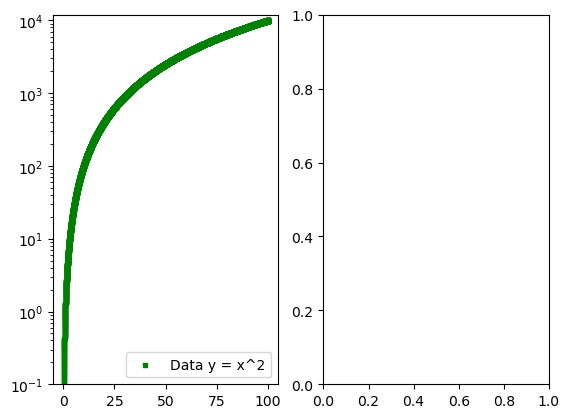

In [7]:
import numpy as np

#create 1000 numbers from 0-100 in steps of 0.1, and then change it into a [1000x1] array, for using in nn.fit()
x  = np.arange(0.0,100,0.01).reshape(-1,1)
#ravel() makes sure that y is a [1000x1] array and not a vector of 1000 values
y  = np.square(x).ravel()

# plot the result
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(x, y, s=5, c='g', marker="s", label='Data y = x^2')
ax1.legend(loc="lower right")
ax1.set_ylim(0.1,12000)
ax1.set_yscale("log")


Starting fit...
...done


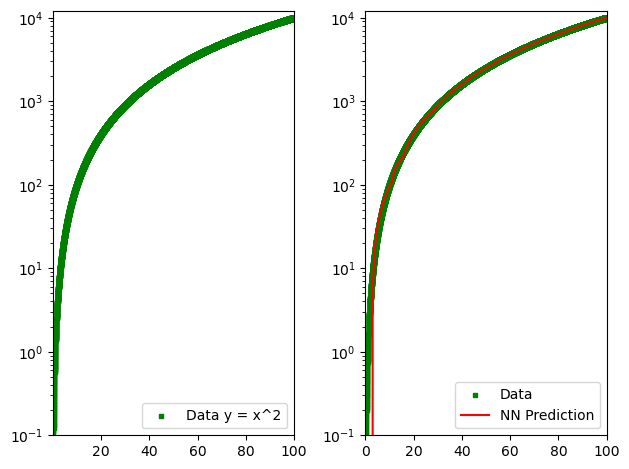

In [12]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt


# create the multi-layer perceptron (MLP) model with some parameters
nn = MLPRegressor(hidden_layer_sizes=(20,20),  activation='relu',
                solver='adam', max_iter=1000)

# train the model
print("Starting fit...")
n = nn.fit(x, y)
print("...done")

# Predict values using the MLP regressor
test_x = np.arange(0.0, 500, 1).reshape(-1,1)
test_y = nn.predict(test_x)

# plot the result of the fit
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(x, y, s=5, c='g', marker="s", label='Data y = x^2')
ax1.legend(loc="lower right")
ax1.set_xlim(0.1,100)
ax1.set_ylim(0.1,12000)

ax1.set_yscale("log")

ax2.scatter(x, y, s=5, c='g', marker="s", label='Data')
ax2.plot(test_x,test_y, "r-", label='NN Prediction')
ax2.legend(loc="lower right")
ax2.set_ylim(0.1,12000)
ax2.set_xlim(0,100)
ax2.set_yscale("log")
plt.tight_layout()
plt.show()


# Decision Tree Regression with AdaBoost


A decision tree is boosted using the AdaBoost algorithm on a 1D
sinusoidal dataset with a small amount of Gaussian noise.
A 299 boosts (300 decision trees) regressor is compared with a single decision tree
regressor. The boosted regressor can fit more
detail than the single tree

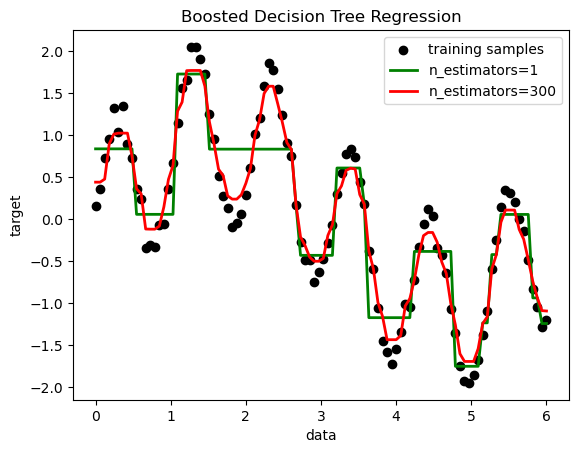

In [17]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Generate two regression models
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)
# train the two models
regr_1.fit(X, y)
regr_2.fit(X, y)

# Use the models to predict values
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# Example of a BDT classifier

First, load the libraries we need

In [20]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

Load the iris dataset the comes with Scikit learn

In [30]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Text(0.5, 1.0, '3 types of flowers')

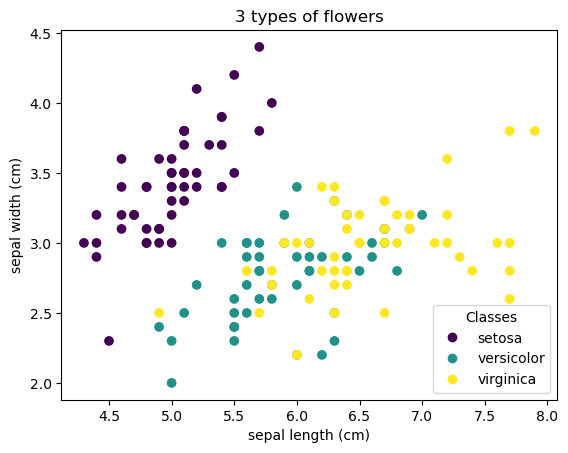

In [35]:
fig, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
ax.set_title("3 types of flowers; features 0, 1")

Text(0.5, 1.0, '3 types of flowers; features 2, 3')

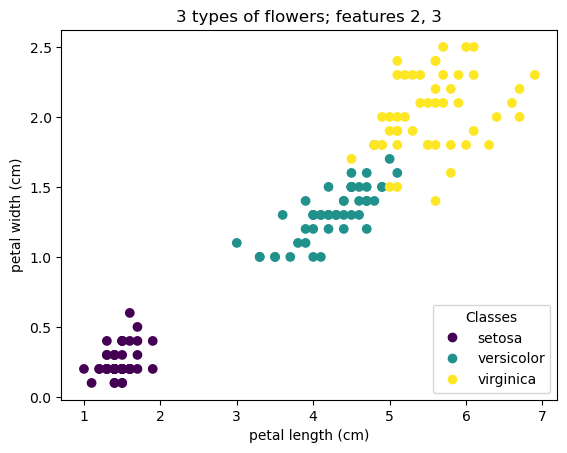

In [36]:
fig, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
ax.set_title("3 types of flowers; features 2, 3")

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [37]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=1,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)



In [38]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_test)
print(y_pred)

Accuracy: 0.9777777777777777
[1 2 1 0 0 1 1 2 1 0 0 2 0 0 1 1 0 2 2 1 0 0 1 0 1 2 0 0 2 1 0 1 0 0 1 1 2
 2 0 0 0 2 0 1 2]
[1 2 1 0 0 1 1 2 1 0 0 2 0 0 1 2 0 2 2 1 0 0 1 0 1 2 0 0 2 1 0 1 0 0 1 1 2
 2 0 0 0 2 0 1 2]
